(0.0, 0.0) [128, 128] 0.03125
(0.0, 0.0) [128, 128] 1.0



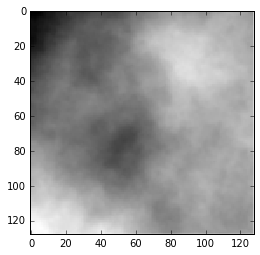

In [4]:
%matplotlib inline
from matplotlib import animation, rc
import matplotlib.pyplot as plt
import numpy as np
import MegaScreen
from IPython.display import HTML


def test(r0=10,L0=1e4,diameter=128,dx=3.3):
    generator=MegaScreen.MegaScreen(r0,L0,windowShape=[diameter,diameter],dx=dx,theta=np.pi/3)
    return ScreenMovie(generator)

def ScreenMovie(screenGenerator):
    fig = plt.figure()
    screen = next(screenGenerator)
    im = plt.imshow(screen, cmap=plt.cm.gray,interpolation='none',animated=True)
    return animation.FuncAnimation(fig, updatefig,interval=100, blit=True, frames=1000,
                                   fargs=(im,screenGenerator))
    

def updatefig(i,im,screenGenerator):
    screen=next(screenGenerator)
    im.set_data(screen)
    im.autoscale()
    return im,

rc('animation', html='html5')

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

anim=test()
print()

In [5]:
anim.save('phase_screen.mp4', writer=writer)

In [ ]:
a